In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import PIL
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [5]:
cd ..

/home/idies/workspace/Storage/lianmign/persistent/UCA_Coding_Test/AnalysisCode


In [6]:
from ImageAnalysis import ImageAnalysisCode

In [7]:
pwd

'/home/idies/workspace/Storage/lianmign/persistent/UCA_Coding_Test/AnalysisCode'

# Load Pictures

In [132]:
path = '../Test Data/2024/11-2024/25 Nov 2024/FLIR/Align LS'
paths = [path]

In [9]:
rowstart = 300
rowend = 750
columnstart = 450
columnend = 900

Pictures from the new code and get rawImg and OptDenOptDen

In [129]:
optDen, cat, rawImg = ImageAnalysisCode.PreprocessBinImgs(*paths, camera='cha', 
                           examRange=[0, None], rotateAngle=0,
                           rowstart=rowstart, rowend=rowend, columnstart=columnstart, columnend=columnend, 
                           subtract_burntin=0, skipFirstImg='auto', showRawImgs=0, returnRawImgs=1,
                           filterLists=[], 
                           loadVariableLog=1, rebuildCatalogue=0,
                           dirLevelAfterDayFolder=2)

subtract burntin	 0
skip firstImg		 0
picture/iteration	 3
first frame			 0
Warning! The log is 0.94 s earlier than the data file, potential mismatching!
Picked the logfile earlier, the time interval is 0.94 s
Warning! The log is 0.14 s earlier than the data file, potential mismatching!
Picked the logfile earlier, the time interval is 0.15 s
Warning! The log is 0.73 s earlier than the data file, potential mismatching!
Picked the logfile earlier, the time interval is 0.74 s
Warning! The log is 0.20 s earlier than the data file, potential mismatching!
Picked the logfile earlier, the time interval is 0.21 s
Warning! The log is 0.24 s earlier than the data file, potential mismatching!
Picked the logfile earlier, the time interval is 0.25 s
Warning! The log is 0.48 s earlier than the data file, potential mismatching!
Picked the logfile earlier, the time interval is 0.49 s
Warning! The log is 0.69 s earlier than the data file, potential mismatching!
Picked the logfile earlier, the time inter

Run the old code and get images_array and columnDensities

Warning! The log is 0.94 s earlier than the data file, potential mismatching!
Picked the logfile earlier, the time interval is 0.94 s
Warning! The log is 0.14 s earlier than the data file, potential mismatching!
Picked the logfile earlier, the time interval is 0.15 s
Warning! The log is 0.73 s earlier than the data file, potential mismatching!
Picked the logfile earlier, the time interval is 0.74 s
Warning! The log is 0.20 s earlier than the data file, potential mismatching!
Picked the logfile earlier, the time interval is 0.21 s
Warning! The log is 0.24 s earlier than the data file, potential mismatching!
Picked the logfile earlier, the time interval is 0.25 s
Warning! The log is 0.48 s earlier than the data file, potential mismatching!
Picked the logfile earlier, the time interval is 0.49 s
Warning! The log is 0.69 s earlier than the data file, potential mismatching!
Picked the logfile earlier, the time interval is 0.70 s
Finish calculating columnDensities.


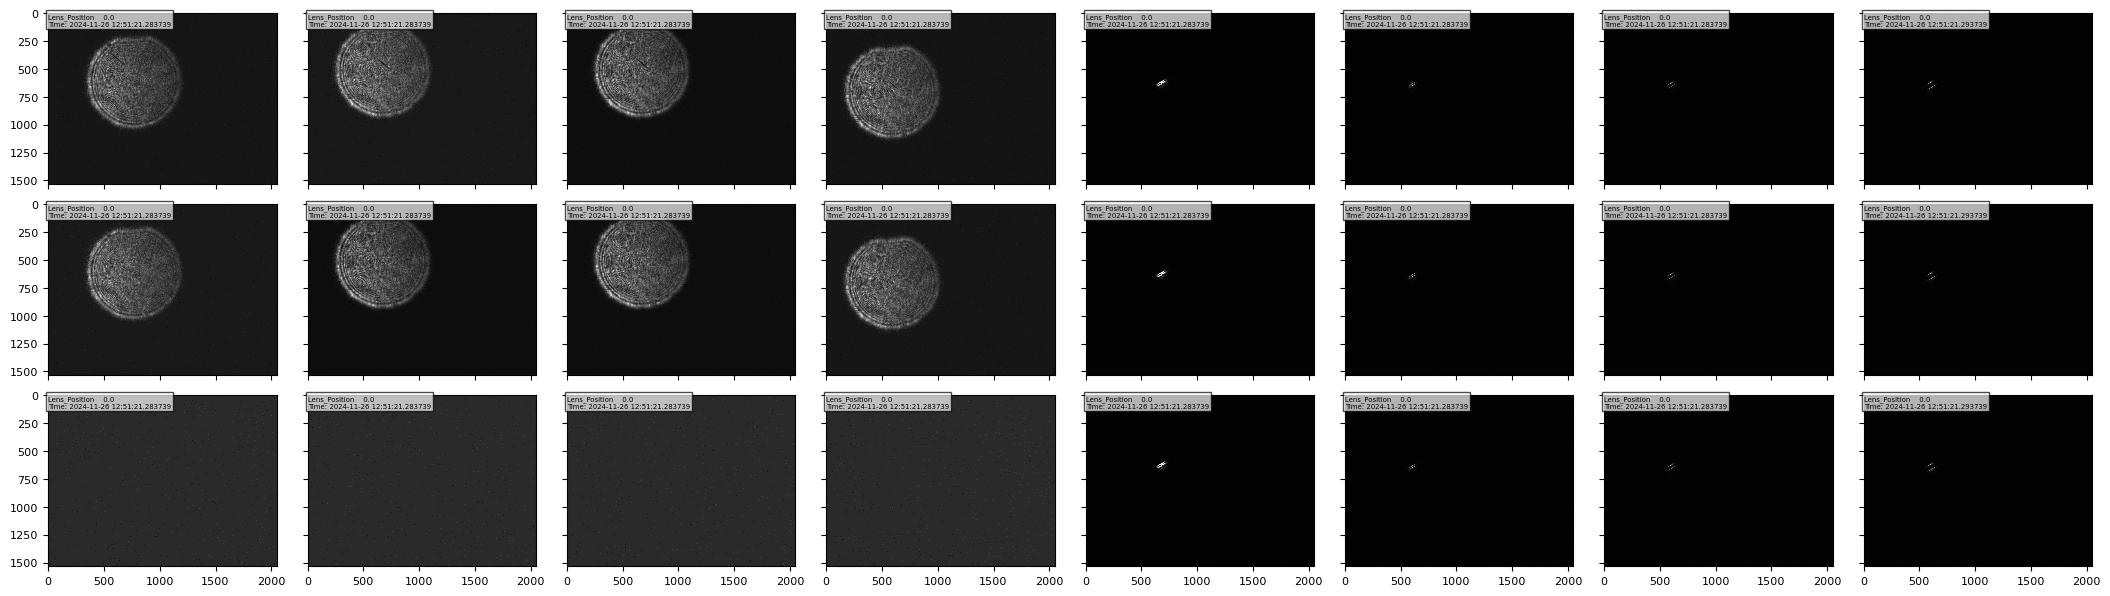

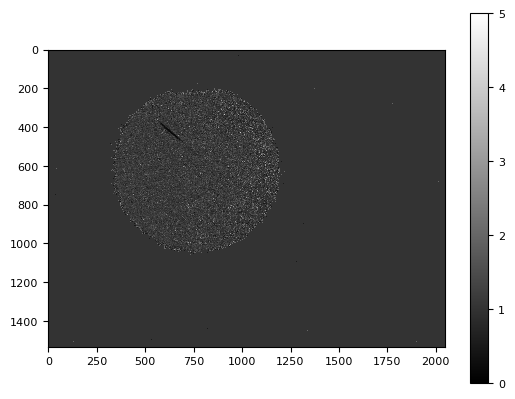

column_density_xylim = (450, 900, 300, 750)
Center x: 776.692426797163
Center y: 631.9897118553914
Number of atoms:0e6
column_density_xylim = (450, 900, 300, 750)
Center x: 667.2650269059999
Center y: 517.8429011771256
Number of atoms:0e6
difference in center x: -109.42739989116308
difference in center y: -114.14681067826587
column_density_xylim = (450, 900, 300, 750)
Center x: 663.9597515138943
Center y: 454.412645331399
Number of atoms:0e6
column_density_xylim = (450, 900, 300, 750)
Center x: 588.3882257604196
Center y: 1358.5953781486571
Number of atoms:0e6
difference in center x: -75.5715257534747
difference in center y: 904.182732817258
column_density_xylim = (450, 900, 300, 750)
Center x: 679.6813791897117
Center y: 638.9547207900265
Number of atoms:0e6
column_density_xylim = (450, 900, 300, 750)
Center x: 604.4545039115969
Center y: 654.4728427527783
Number of atoms:0e6
difference in center x: -75.22687527811479
difference in center y: 15.51812196275182
column_density_xylim = (4

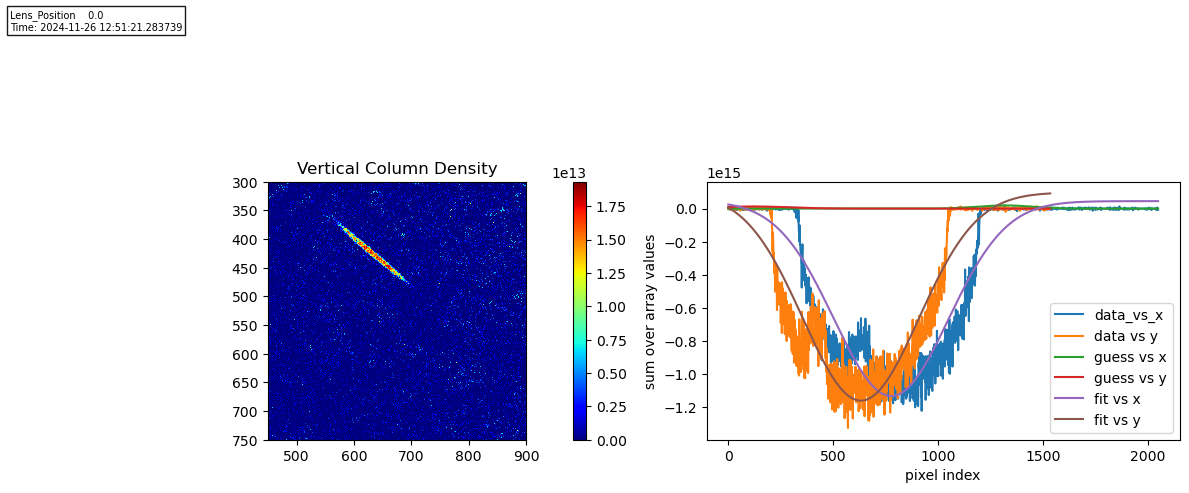

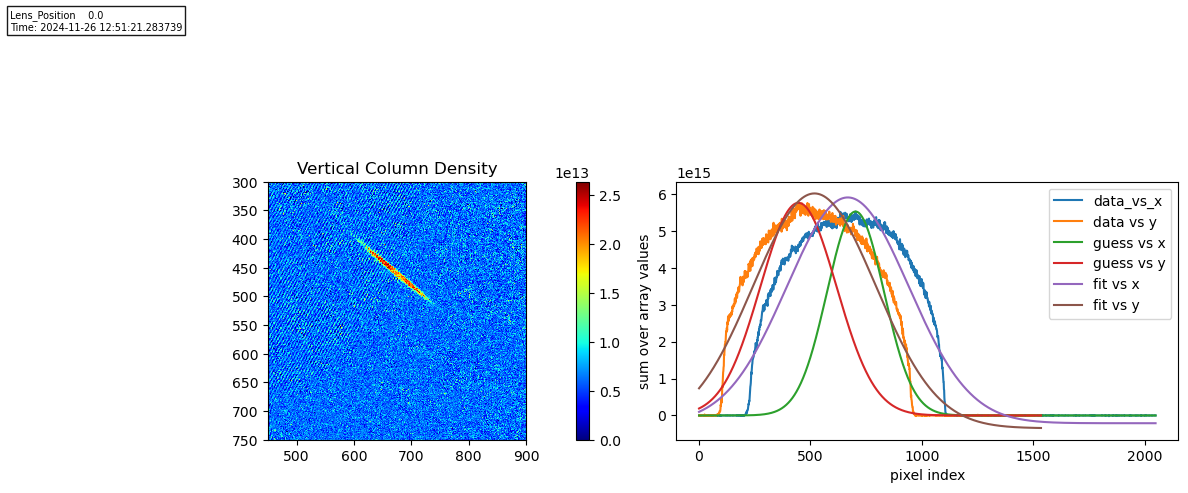

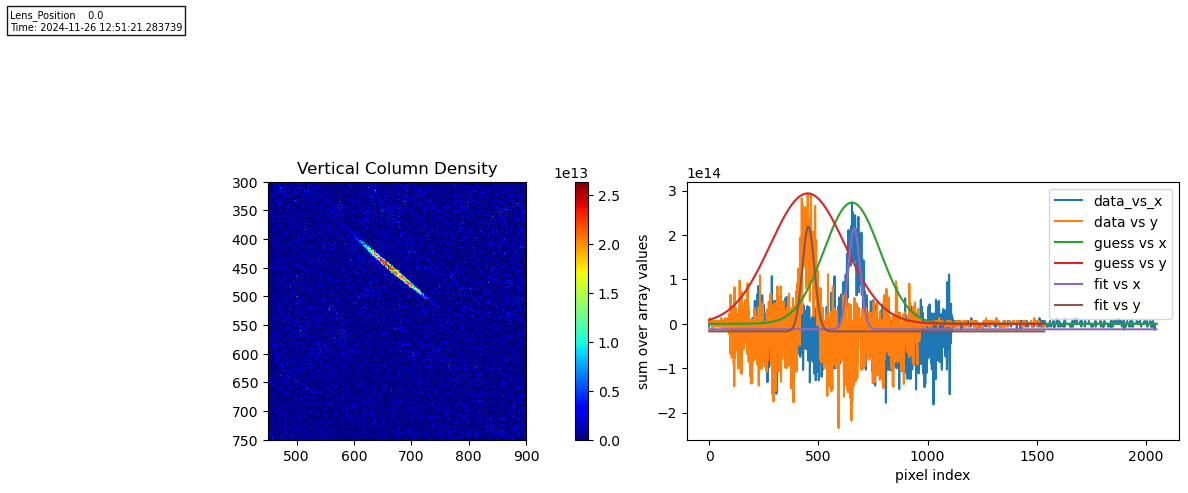

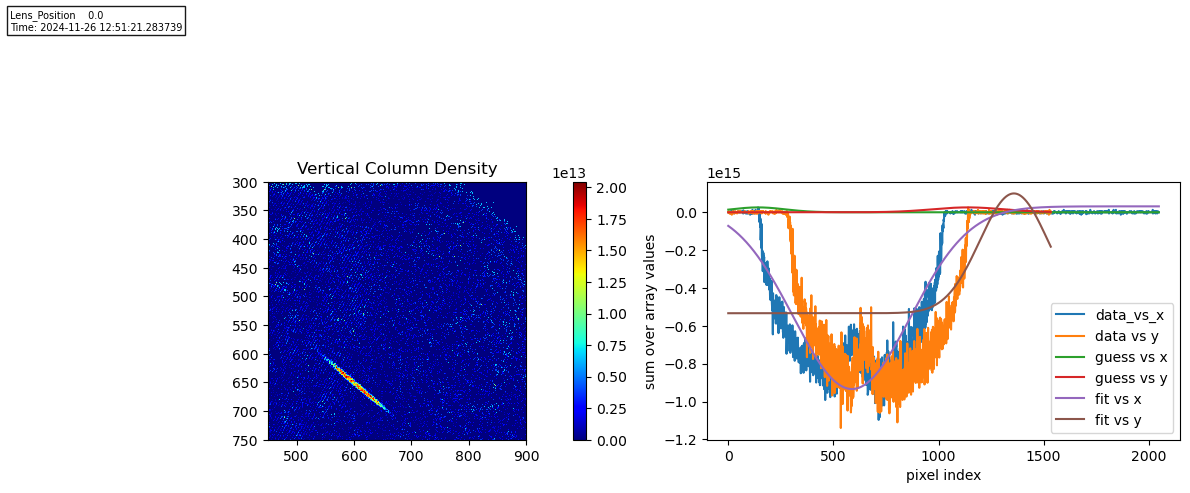

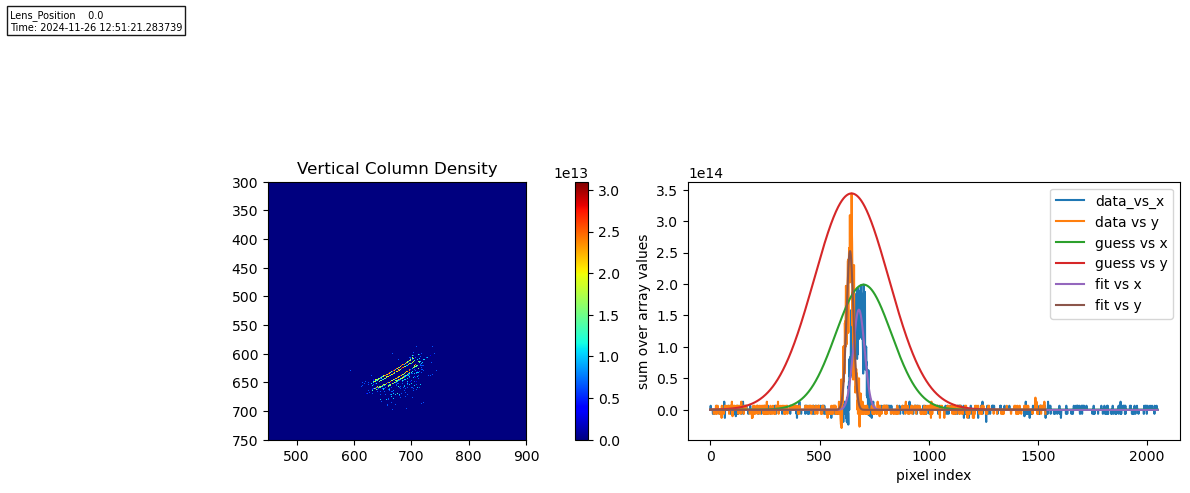

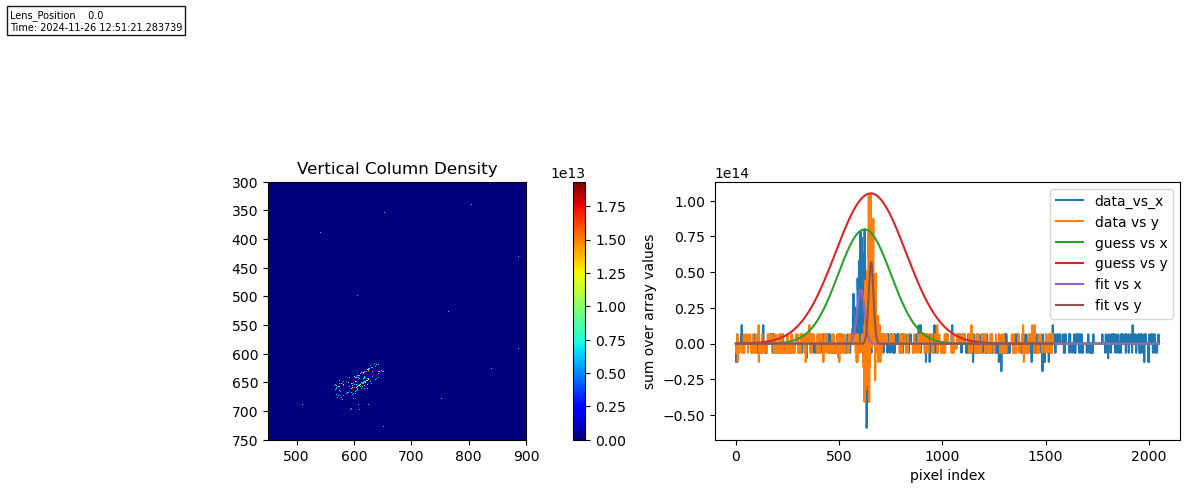

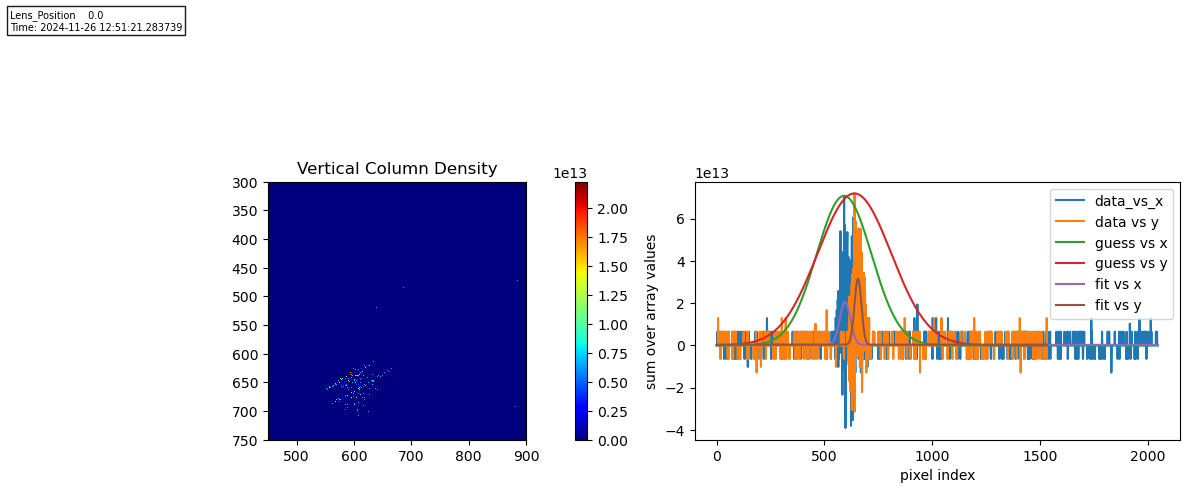

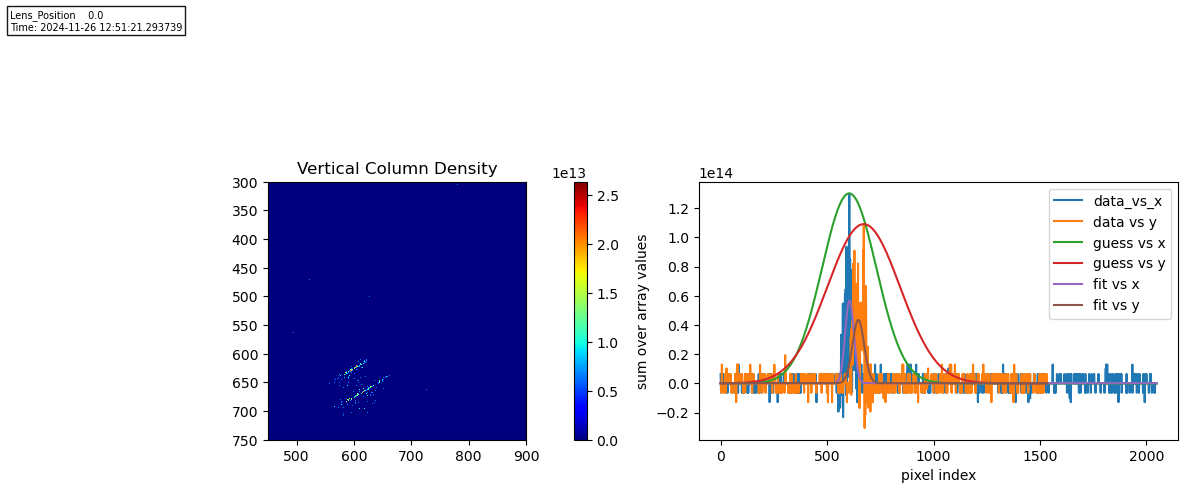

In [123]:
run 'Applications/acalyze chameleon binary.py'

In [12]:
params.cross_section

1.0748712109895707e-13

In [13]:
rawImg_old = images_array
rawImg_old.shape

(8, 3, 1534, 2048)

In [14]:
rawImg.shape

(8, 3, 1534, 2048)

In [15]:
np.array_equal(rawImg_old, rawImg)

True

In [16]:
optDen.shape

(8, 450, 450)

In [124]:
columnDensities.shape

(8, 1534, 2048)

*the mismatch in size is because the crop is removed from absImageSimple and commited at the end of preprocess, or in the guassian fit in the old chameleon code*

In [125]:
#crop and rescale 
columnDensitiesCrop = columnDensities[:, rowstart:rowend, columnstart:columnend]
optDen_old = columnDensitiesCrop * params.cross_section
optDen_old.shape

(8, 450, 450)

In [126]:
optDen_old.max(), optDen_old.min()

(3.332204510175204, -2.995732273553991)

In [127]:
optDen.max(), optDen.min()

(11.090339630053647, -11.090339630053647)

# Some plots

*New optical density*

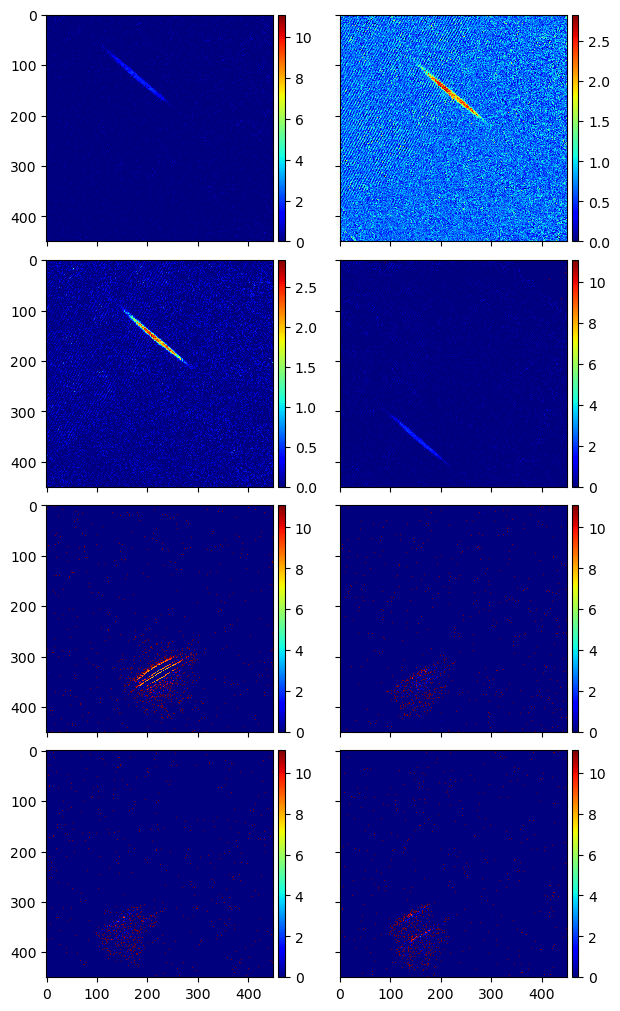

In [130]:
fig, axes = plt.subplots(4, 2, figsize=[6,10],
                         sharex=True, sharey=True,
                         layout='constrained')
ax = axes.flatten()
for ii in range(len(ax)):
    im = ax[ii].imshow(optDen[ii], cmap='jet', 
                       interpolation='nearest',
                       vmin=0, 
                       # vmax=optDen_old[ii].max() # set the vmax to the max in the old CDs
                      )
    divider = make_axes_locatable(ax[ii])
    cax = divider.append_axes('right', size='3%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

*Old optical Densities*

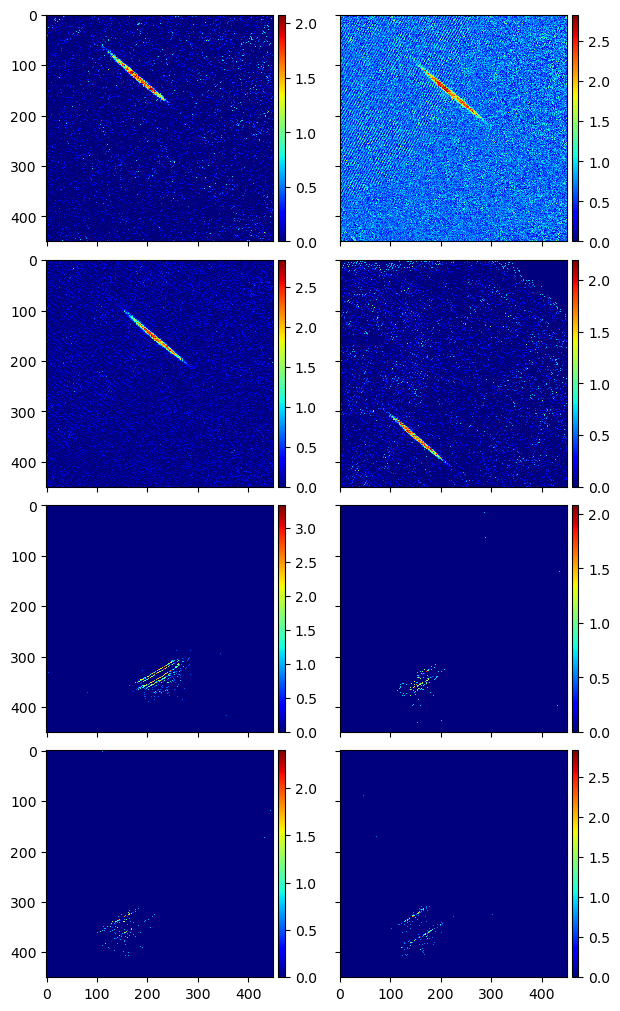

In [128]:
fig, axes = plt.subplots(4, 2, figsize=[6, 10],
                         sharex=True, sharey=True,
                         layout='constrained')
ax = axes.flatten()
for ii in range(len(ax)):
    im = ax[ii].imshow(optDen_old[ii], cmap='jet',
                       interpolation='nearest',
                       vmin=0, 
                       # vmax=colDenImg[ii].max()
                      )
    divider = make_axes_locatable(ax[ii])
    cax = divider.append_axes('right', size='3%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

In [23]:
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'nearest'

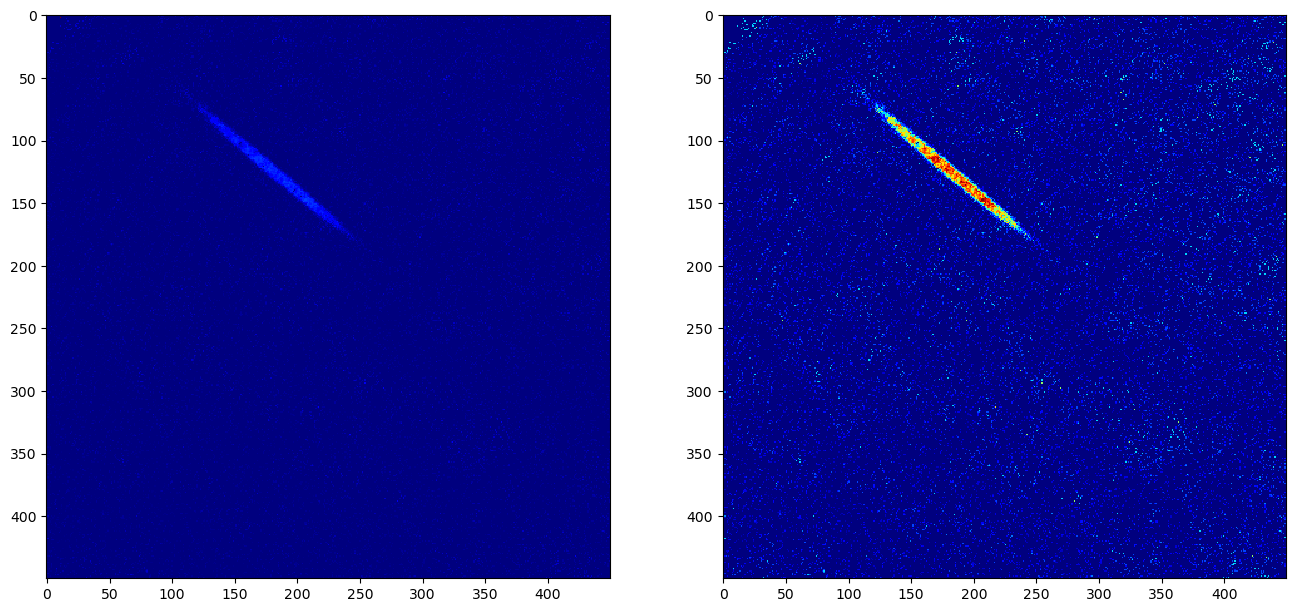

In [24]:
vlim=[0, None]
fig, ax = plt.subplots(1, 2, figsize=(16, 12))
ax[0].imshow(optDen[0], clim=vlim)
ax[1].imshow(optDen_old[0], clim=vlim)

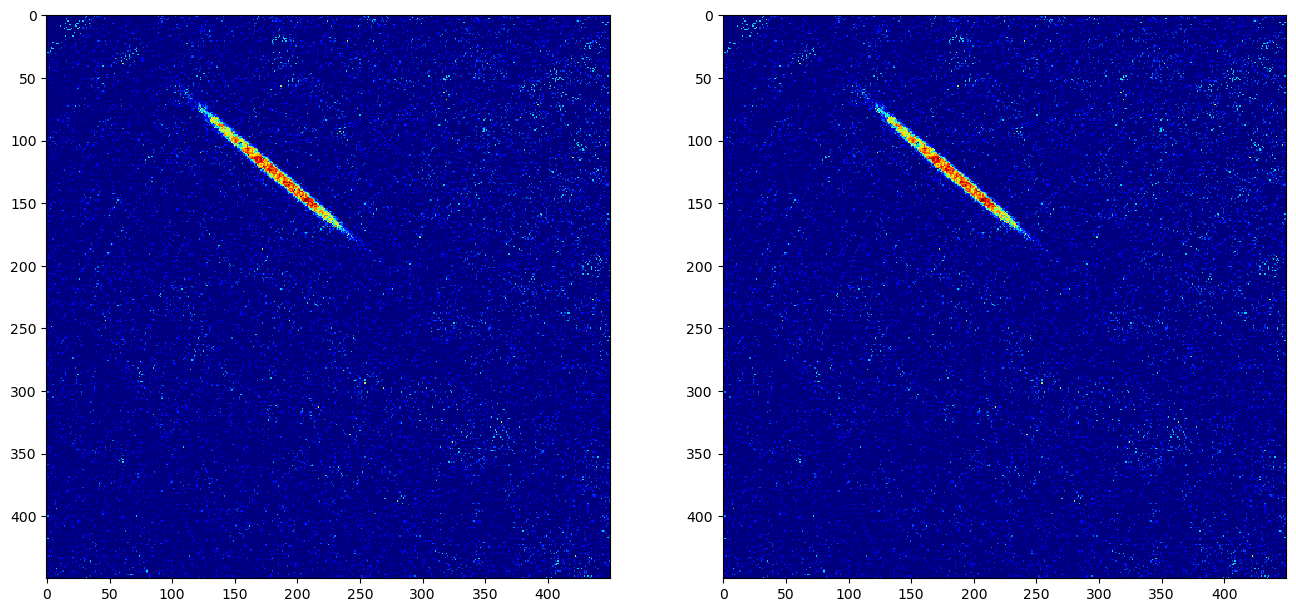

In [29]:
vlim=[0, optDen_old[0].max()]
fig, ax = plt.subplots(1, 2, figsize=(16, 12))
ax[0].imshow(optDen[0], clim=vlim)
ax[1].imshow(optDen_old[0], clim=vlim)

In [26]:
diff = optDen[0] - optDen_old[0]

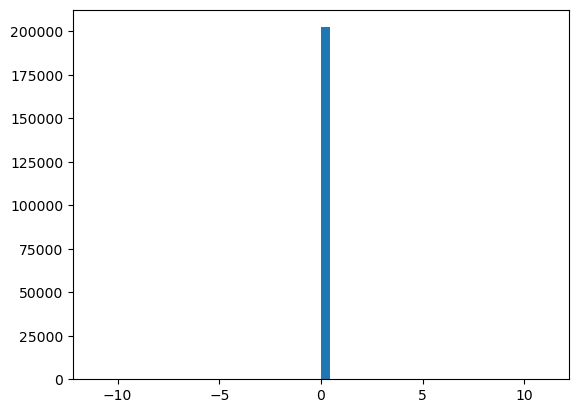

In [30]:
plt.hist(diff.flatten(), bins=50);

In [87]:
def CountElement(input, width=25):
    input = np.asarray(input)
    for ii in np.unique(input):
        n = (input==ii).sum()
        print( '{:>{}} count: {}'.format(ii, width, n) )        

In [83]:
CountElement(diff)

      -11.090339630053647 count: 2
      -11.090339630053645 count: 3
   -2.220446049250313e-16 count: 60
  -2.7755575615628914e-17 count: 39
                      0.0 count: 202395
       11.090339630053647 count: 1


In [89]:
rat = optDen[0] / optDen_old[0]

/tmp/ipykernel_84/1347595515.py:1: RuntimeWarning: divide by zero encountered in divide
  rat = optDen[0] / optDen_old[0]
/tmp/ipykernel_84/1347595515.py:1: RuntimeWarning: invalid value encountered in divide
  rat = optDen[0] / optDen_old[0]


In [90]:
np.unique(rat)

array([       -inf, -6.99998899, -5.89081545, -5.1896364 ,  1.        ,
        1.        ,  1.        ,         nan])

# Raw imges are identical, see what happened

In [92]:
np.array_equal(optDen, optDen_old)

False

In [93]:
np.array_equal(rawImg, rawImg_old)

True

In [139]:
_, _, _, columnDensities_old, _, _ = ImageAnalysisCode.absImagingSimple(rawImg, params=params)

Finish calculating columnDensities.


In [114]:
opticalDensity = ImageAnalysisCode.absImagingSimpleV2(rawImg)
columnDensities_new = opticalDensity / params.cross_section

Finish calculating opticalDensity.


*They are the same!*

In [119]:
np.array_equal( columnDensities_new, columnDensities_old)

True

In [120]:
columnDensities_new = columnDensities_new[:,rowstart:rowend, columnstart:columnend]
columnDensities_old = columnDensities_old[:,rowstart:rowend, columnstart:columnend]

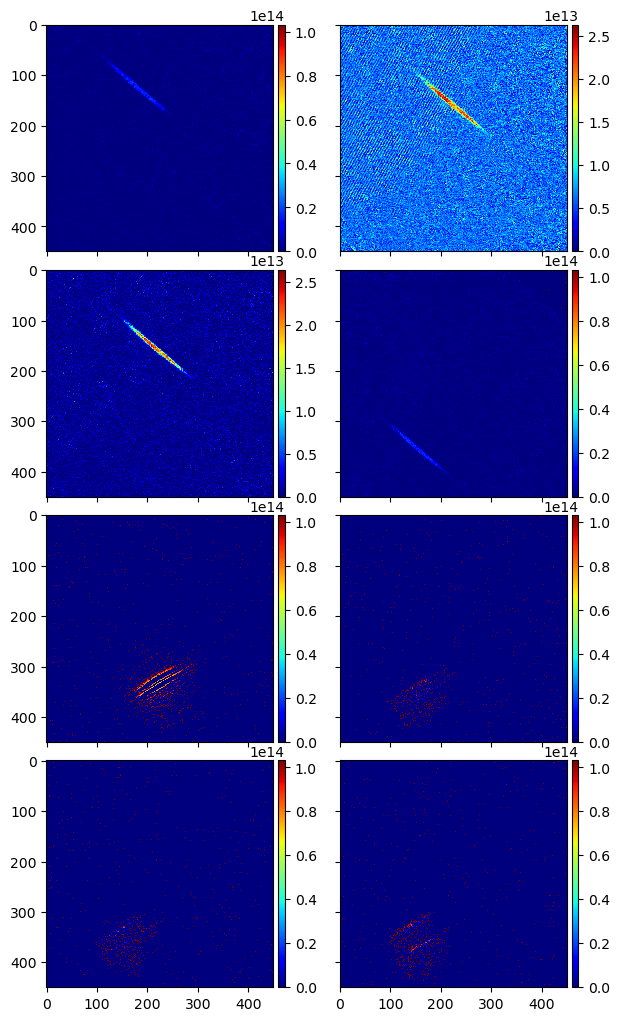

In [121]:
fig, axes = plt.subplots(4, 2, figsize=[6, 10],
                         sharex=True, sharey=True,
                         layout='constrained')
ax = axes.flatten()
for ii in range(len(ax)):
    im = ax[ii].imshow(columnDensities_new[ii], cmap='jet',
                       interpolation='nearest',
                       vmin=0, 
                       # vmax=colDenImg[ii].max()
                      )
    divider = make_axes_locatable(ax[ii])
    cax = divider.append_axes('right', size='3%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

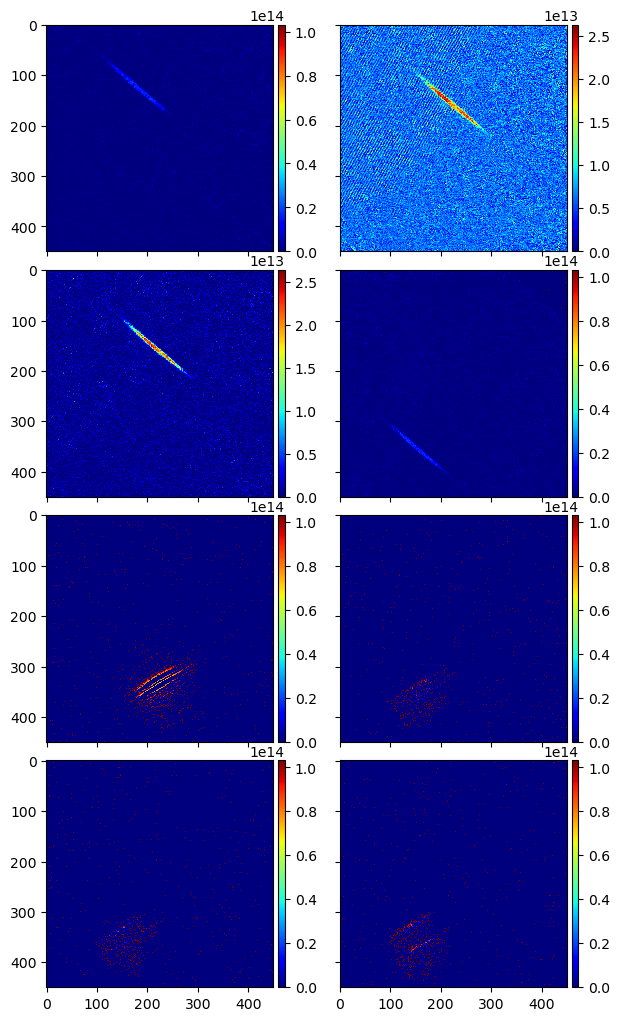

In [122]:
fig, axes = plt.subplots(4, 2, figsize=[6, 10],
                         sharex=True, sharey=True,
                         layout='constrained')
ax = axes.flatten()
for ii in range(len(ax)):
    im = ax[ii].imshow(columnDensities_old[ii], cmap='jet',
                       interpolation='nearest',
                       vmin=0, 
                       # vmax=colDenImg[ii].max()
                      )
    divider = make_axes_locatable(ax[ii])
    cax = divider.append_axes('right', size='3%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

# Pinpoint the problem!

*Raw images are the same, but produced different column densities? The types of the raw images are different!*

In [166]:
np.array_equal(rawImg, images_array)

True

In [184]:
rawImg.dtype, images_array.dtype

(dtype('uint16'), dtype('float64'))

Finish calculating opticalDensity.


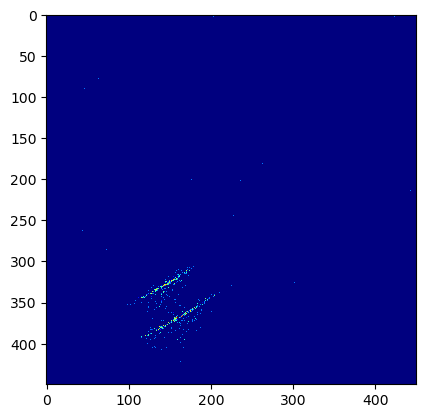

In [185]:
OD1 = ImageAnalysisCode.absImagingSimpleV2(images_array)
plt.imshow(CD1[-1, rowstart:rowend, columnstart:columnend], vmin=0)

Finish calculating opticalDensity.


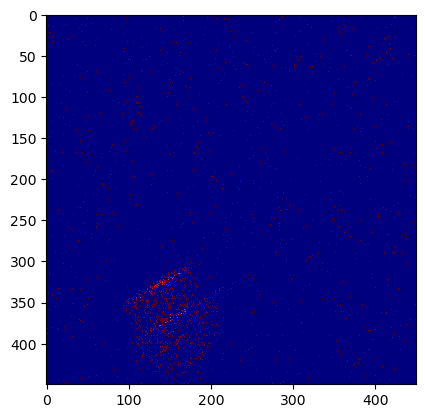

In [215]:
# Before fix
OD2 = ImageAnalysisCode.absImagingSimpleV2(rawImg)
plt.imshow(OD2[-1, rowstart:rowend, columnstart:columnend], vmin=0)

Finish calculating opticalDensity.


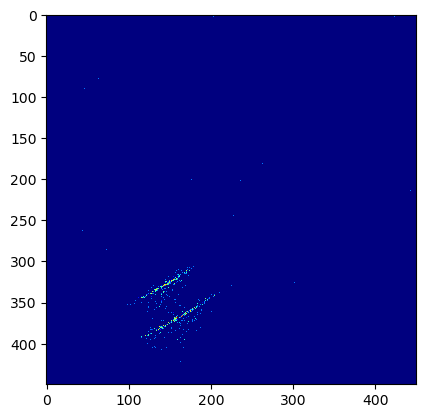

In [216]:
# After fix
OD2 = ImageAnalysisCode.absImagingSimpleV2(rawImg)
plt.imshow(OD2[-1, rowstart:rowend, columnstart:columnend], vmin=0)

In [217]:
optDen, cat = ImageAnalysisCode.PreprocessBinImgs(*paths, camera='cha', 
                           examRange=[0, None], rotateAngle=0,
                           rowstart=rowstart, rowend=rowend, columnstart=columnstart, columnend=columnend, 
                           subtract_burntin=0, skipFirstImg='auto', showRawImgs=0, returnRawImgs=0,
                           filterLists=[], 
                           loadVariableLog=1, rebuildCatalogue=0,
                           dirLevelAfterDayFolder=2)

subtract burntin	 0
skip firstImg		 0
picture/iteration	 3
first frame			 0
Finish calculating opticalDensity.


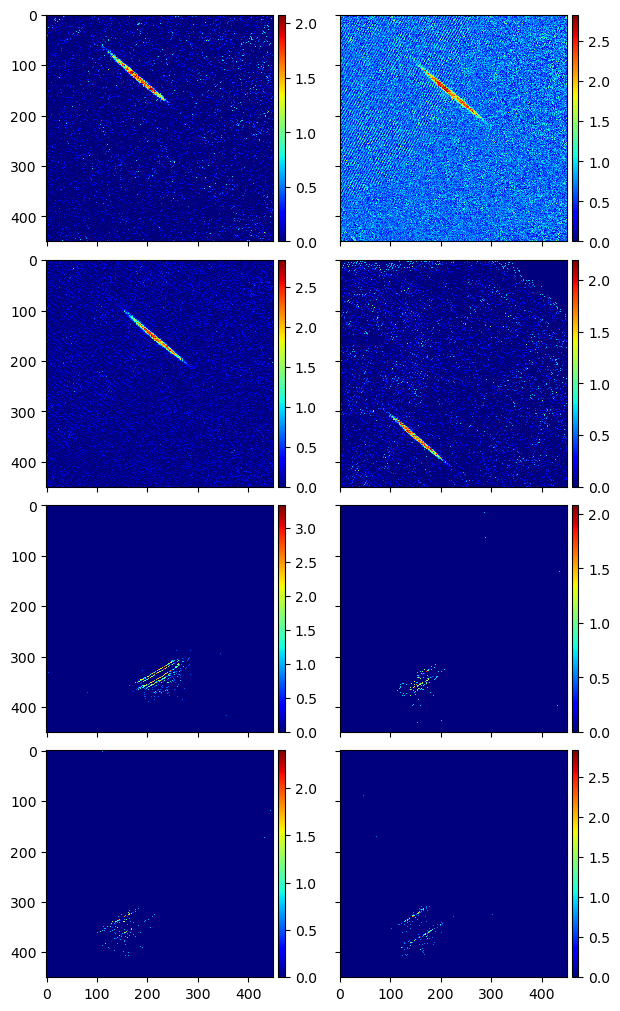

In [218]:
fig, axes = plt.subplots(4, 2, figsize=[6, 10],
                         sharex=True, sharey=True,
                         layout='constrained')
ax = axes.flatten()
for ii in range(len(ax)):
    im = ax[ii].imshow(optDen[ii], cmap='jet',
                       interpolation='nearest',
                       vmin=0, 
                       # vmax=colDenImg[ii].max()
                      )
    divider = make_axes_locatable(ax[ii])
    cax = divider.append_axes('right', size='3%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

# Check the case for Zyla

subtract burntin	 0
skip firstImg		 1
picture/iteration	 4
first frame			 1
Loading pictures: |
Finish loading pictures, 16 raw images loaded.
Finish calculating opticalDensity.
Fitting y data: |
Fitting x data: |
Finish fitting data.


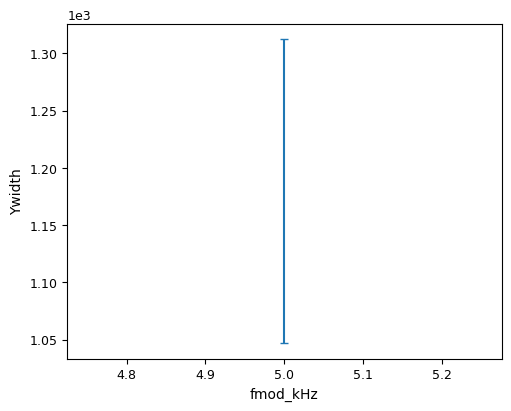

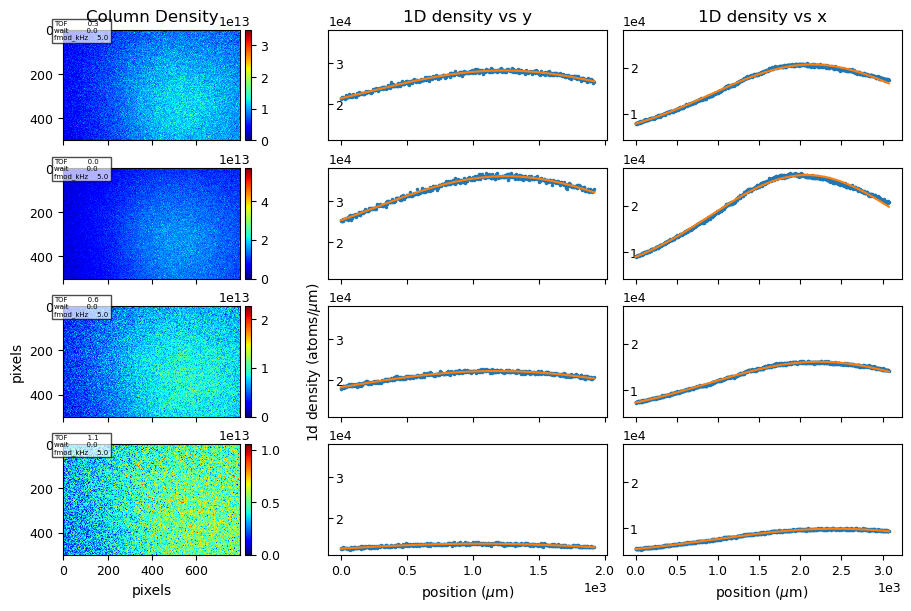

In [220]:
run 'Applications/Analyze Zyla_Mar2024.py'

In [221]:
rawImg.dtype

dtype('uint16')

In [227]:
dataPath

['../Test Data/2024/11-2024/07 Nov 2024/Andor/D1 temp']

In [ ]:
opticalDensity, variableLog = ImageAnalysisCode.PreprocessZylaImg(*dataPath, examRange=[examFrom, examUntil], 
                                                                   rotateAngle=rotateAngle, 
                                                                   rowstart=rowstart, rowend=rowend, 
                                                                   columnstart=columnstart, columnend=columnend,
                                                                   subtract_burntin=subtract_burntin, 
                                                                   skipFirstImg=skipFirstImg, 
                                                                   showRawImgs=showRawImgs, 
                                                                   #!!!!!!!!!!!!!!!!!
                                                                   #! Keep rebuildCatalogue = 0 unless necessary!
                                                                   rebuildCatalogue=0,
                                                                   ##################
                                                                    # filterLists=[['TOF<1']],
                                                                  ret
                                                                    )

In [228]:
optDen, cat, rawImgs = ImageAnalysisCode.PreprocessBinImgs(*dataPath, camera='zyla', 
                           examRange=[0, None], rotateAngle=0,
                           rowstart=rowstart, rowend=rowend, columnstart=columnstart, columnend=columnend, 
                           subtract_burntin=0, skipFirstImg='auto', showRawImgs=0, returnRawImgs=1,
                           filterLists=[], 
                           loadVariableLog=1, rebuildCatalogue=0,
                           dirLevelAfterDayFolder=2)

subtract burntin	 0
skip firstImg		 1
picture/iteration	 4
first frame			 1
Loading pictures: |
Finish loading pictures, 16 raw images loaded.
Finish calculating opticalDensity.


In [230]:
rawImgs.shape, rawImgs.dtype

((4, 4, 1890, 1634), dtype('float64'))

In [231]:
rawImgs.max(), rawImgs.min()

(1128.0, 0.0)